# CIS IEEE - 4° Período (CNNs)

In [1]:
#Imports padrão para o desenvolvimento da rede e visualização do dataset
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

#Outros imports para analise dos dados
import pandas as pd
import matplotlib.pyplot  as plt
from PIL import Image
from pathlib import Path
import imagesize
import numpy as np
import cv2

C:\Users\breno\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Precisamos que todas as imagens do dataset tenham as mesmas dimensões após a realização da 'data augmentation'. Antes disso, vamos fazer uma breve análise das dimensões das imagens presentes no dataset.

## Análise do dataset

In [2]:
# Analise das resolucoes das imagens dos gatinhos
cats = [img.name for img in Path('animals\\cats\\').iterdir() if img.suffix == ".jpg"]
cats_meta = {}
for f in cats: cats_meta[str(f)] = imagesize.get('animals\\cats\\'+f)

#Conversao para um dataframe e analise das dimensoes
cats_meta_df = pd.DataFrame.from_dict([cats_meta]).T.reset_index().set_axis(['FileName', 'Size'], axis='columns', inplace=False)
cats_meta_df[["Width", "Height"]] = pd.DataFrame(cats_meta_df["Size"].tolist(), index=cats_meta_df.index)
cats_meta_df["Aspect Ratio"] = round(cats_meta_df["Width"] / cats_meta_df["Height"], 2)

print(f'Numero de imagens de gatos: {len(cats_meta_df)}')
cats_meta_df.head()

Numero de imagens de gatos: 1000


,FileName,Size,Width,Height,Aspect Ratio
0,cats_00001.jpg,"(500, 374)",500,374,1.34
1,cats_00002.jpg,"(499, 375)",499,375,1.33
2,cats_00003.jpg,"(120, 88)",120,88,1.36
3,cats_00004.jpg,"(500, 390)",500,390,1.28
4,cats_00005.jpg,"(500, 374)",500,374,1.34


Text(0, 0.5, 'Height')

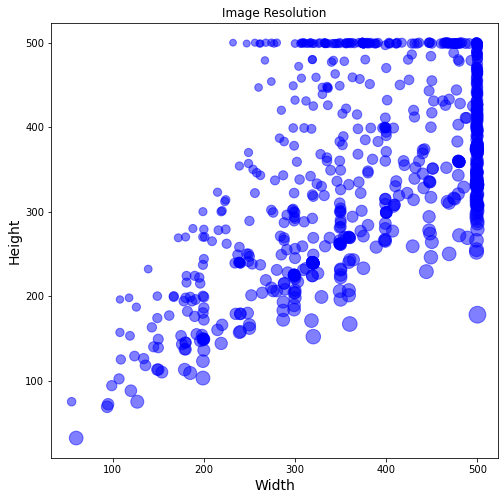

In [3]:
#Visualização das resoluções

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
points = ax.scatter(cats_meta_df.Width, cats_meta_df.Height, color='blue', alpha=0.5, s=cats_meta_df["Aspect Ratio"]*100, picker=True)
ax.set_title("Image Resolution")
ax.set_xlabel("Width", size=14)
ax.set_ylabel("Height", size=14)

In [4]:
# Analise das resolucoes das imagens dos cachorros
dogs = [img.name for img in Path('animals\\dogs\\').iterdir() if img.suffix == ".jpg"]
dogs_meta = {}
for f in dogs: dogs_meta[str(f)] = imagesize.get('animals\\dogs\\'+f)

#Conversao para um dataframe e analise das dimensoes
dogs_meta_df = pd.DataFrame.from_dict([dogs_meta]).T.reset_index().set_axis(['FileName', 'Size'], axis='columns', inplace=False)
dogs_meta_df[["Width", "Height"]] = pd.DataFrame(dogs_meta_df["Size"].tolist(), index=dogs_meta_df.index)
dogs_meta_df["Aspect Ratio"] = round(dogs_meta_df["Width"] / dogs_meta_df["Height"], 2)

print(f'Numero de imagens de cachorros: {len(dogs_meta_df)}')
dogs_meta_df.head()

Numero de imagens de cachorros: 1000


,FileName,Size,Width,Height,Aspect Ratio
0,dogs_00001.jpg,"(382, 478)",382,478,0.80
1,dogs_00002.jpg,"(321, 260)",321,260,1.23
2,dogs_00003.jpg,"(320, 271)",320,271,1.18
3,dogs_00004.jpg,"(327, 499)",327,499,0.66
4,dogs_00005.jpg,"(350, 260)",350,260,1.35


Text(0, 0.5, 'Height')

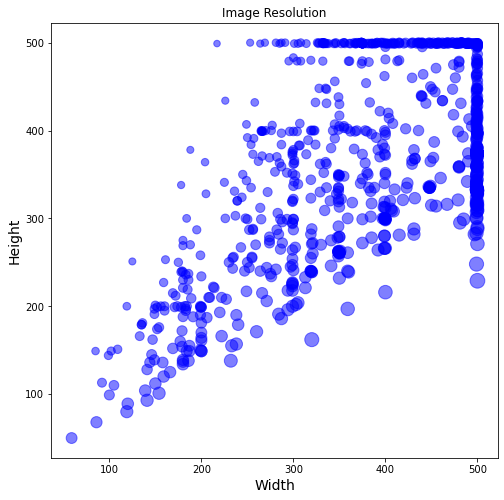

In [5]:
#Visualização das resoluções

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
points = ax.scatter(dogs_meta_df.Width, dogs_meta_df.Height, color='blue', alpha=0.5, s=dogs_meta_df["Aspect Ratio"]*100, picker=True)
ax.set_title("Image Resolution")
ax.set_xlabel("Width", size=14)
ax.set_ylabel("Height", size=14)

In [6]:
# Analise das resolucoes das imagens dos pandas
pandas = [img.name for img in Path('animals\\panda\\').iterdir() if img.suffix == ".jpg"]
pandas_meta = {}
for f in pandas: pandas_meta[str(f)] = imagesize.get('animals\\panda\\'+f)

#Conversao para um dataframe e analise das dimensoes
pandas_meta_df = pd.DataFrame.from_dict([pandas_meta]).T.reset_index().set_axis(['FileName', 'Size'], axis='columns', inplace=False)
pandas_meta_df[["Width", "Height"]] = pd.DataFrame(pandas_meta_df["Size"].tolist(), index=pandas_meta_df.index)
pandas_meta_df["Aspect Ratio"] = round(pandas_meta_df["Width"] / pandas_meta_df["Height"], 2)

print(f'Numero de imagens de pandas: {len(pandas_meta_df)}')
pandas_meta_df.head()

Numero de imagens de pandas: 1000


,FileName,Size,Width,Height,Aspect Ratio
0,panda_00001.jpg,"(480, 500)",480,500,0.96
1,panda_00002.jpg,"(500, 375)",500,375,1.33
2,panda_00003.jpg,"(500, 375)",500,375,1.33
3,panda_00004.jpg,"(375, 500)",375,500,0.75
4,panda_00005.jpg,"(500, 408)",500,408,1.23


Text(0, 0.5, 'Height')

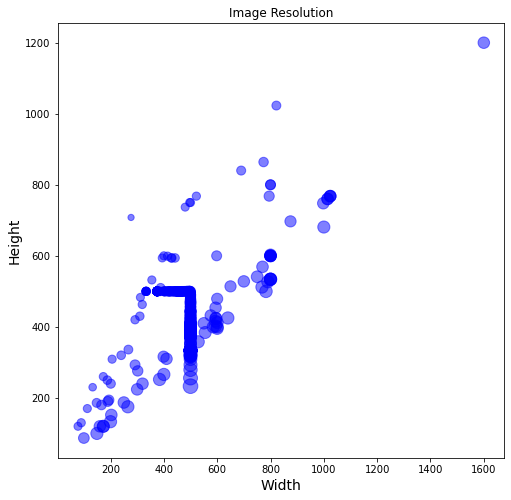

In [7]:
#Visualização das resoluções

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
points = ax.scatter(pandas_meta_df.Width, pandas_meta_df.Height, color='blue', alpha=0.5, s=pandas_meta_df["Aspect Ratio"]*100, picker=True)
ax.set_title("Image Resolution")
ax.set_xlabel("Width", size=14)
ax.set_ylabel("Height", size=14)

A partir dos gráficos gerados, podemos ver que as imagens de gatos e cachorros tem um "limite" de tamanho em resoluçoes por volta de 500x500, enquanto que as imagens de panda já se extendem para resoluções maiores.

Vale também destcar que todos os datasets tem o mesmo tamanho de 1000 imagens.

## Handling do dataset - Training, validation e testing

Precisamos agora separar nosso dataset de imagens nas partes para o treinamento, validação e teste.

In [8]:
#Usado para separar em training, validation e test sets
import splitfolders

input_folder = 'animals' #Estao no mesmo lugar que o notebook no meu computador
output_folder = 'data' #Esta no mesmo lugar que o notebook no meu computador

splitfolders.ratio(input_folder, output_folder, seed=42, ratio=(0.8, 0.1, 0.1), group_prefix=None)

Copying files: 3000 files [00:26, 114.36 files/s]


Lembrando que precisamos realizar o resize das imagens para que não seja necessário muito tempo nem esforço computacional. 

É importante que seja selecionado uma size que ainda permita que a rede reconheça as imagens.

 Vamos dar uma breve analisada no que pode ainda ser reconhecido como um animal quando modificamos as dimensões das imagens.

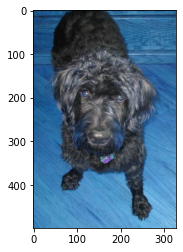

In [9]:
imageTest = cv2.imread(r'animals\\dogs\\dogs_00004.jpg')
plt.imshow(imageTest)

Vamos reduzir o tamanho da imagem para 150x150.

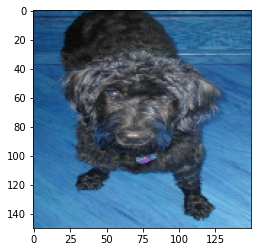

In [10]:
imageTest = cv2.resize(imageTest, (150,150))
plt.imshow(imageTest)

Podemos ver que utilizando essas dimensões não perdemos informação do animal na imagem. Usaremos então essas dimensões.

In [11]:
#Preparação dos datasets de teste, treinamento e validação

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255 #Redução dos valores dos pixels das imagens
)

validation_datagen = ImageDataGenerator(
    rescale=1.0 / 255
)

test_datagen = ImageDataGenerator(
    rescale=1.0 / 255 
)

train_generator = train_datagen.flow_from_directory(
    r'data\train',
    target_size=(150, 150), #Tamanho das imagens que iremos utilizar
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    r'data\val',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    r'data\test',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 2400 images belonging to 3 classes.
Found 300 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


## Implementação da NN

In [12]:
#Desenvolvimento da rede neural

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5), #Evitar overfitting
    Dense(3, activation='softmax')  #São 3 classes então temos 3 saídas - cats/dogs/pandas
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [14]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [15]:
num_epochs = 11

history = model.fit(
    train_generator,
    epochs=num_epochs,
    validation_data=validation_generator
)

Epoch 1/11
75/75 [==============================] - 71s 928ms/step - loss: 0.8939 - accuracy: 0.5583 - val_loss: 0.7897 - val_accuracy: 0.6400
Epoch 2/11
75/75 [==============================] - 74s 985ms/step - loss: 0.6958 - accuracy: 0.6388 - val_loss: 0.6794 - val_accuracy: 0.6600
Epoch 3/11
75/75 [==============================] - 67s 893ms/step - loss: 0.6160 - accuracy: 0.6913 - val_loss: 0.6746 - val_accuracy: 0.7067
Epoch 4/11
75/75 [==============================] - 68s 906ms/step - loss: 0.5101 - accuracy: 0.7517 - val_loss: 0.6364 - val_accuracy: 0.6933
Epoch 5/11
75/75 [==============================] - 69s 923ms/step - loss: 0.4454 - accuracy: 0.8008 - val_loss: 0.6501 - val_accuracy: 0.6933
Epoch 6/11
75/75 [==============================] - 68s 897ms/step - loss: 0.3495 - accuracy: 0.8413 - val_loss: 0.7969 - val_accuracy: 0.7433
Epoch 7/11
75/75 [==============================] - 71s 948ms/step - loss: 0.2440 - accuracy: 0.9004 - val_loss: 0.8731 - val_accuracy: 0.7200

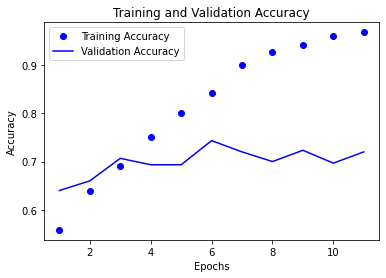

In [16]:
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

epochs = range(1, num_epochs + 1)

plt.plot(epochs, training_accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

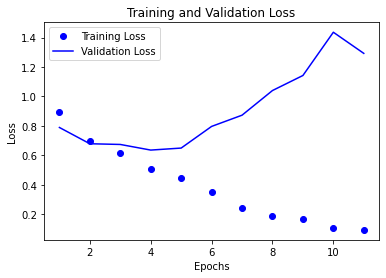

In [17]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

plt.plot(epochs, training_loss, 'bo', label='Training Loss')
plt.plot(epochs, validation_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
test_evaluation = model.evaluate(test_generator)
print("Test Loss:", test_evaluation[0])
print("Test Accuracy:", test_evaluation[1])

10/10 [==============================] - 3s 338ms/step - loss: 1.0462 - accuracy: 0.7133
Test Loss: 1.0462219715118408
Test Accuracy: 0.7133333086967468


In [19]:
#Ver como o modelo irá realizar as predições nas fotos do test set

predictions = model.predict_generator(test_generator)
class_labels = ['Cat', 'Dog', 'Panda']
predicted_classes = np.argmax(predictions, axis=1)
predicted_labels = [class_labels[predicted_class] for predicted_class in predicted_classes]
filenames = test_generator.filenames

for filename, predicted_label in zip(filenames, predicted_labels):
    print(f"Image: {filename}, Predicted Label: {predicted_label}")


C:\Users\breno\AppData\Local\Temp\ipykernel_22820\1307047825.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator)


Image: cats\cats_00007.jpg, Predicted Label: Cat
Image: cats\cats_00026.jpg, Predicted Label: Cat
Image: cats\cats_00028.jpg, Predicted Label: Cat
Image: cats\cats_00031.jpg, Predicted Label: Dog
Image: cats\cats_00033.jpg, Predicted Label: Cat
Image: cats\cats_00045.jpg, Predicted Label: Dog
Image: cats\cats_00047.jpg, Predicted Label: Dog
Image: cats\cats_00072.jpg, Predicted Label: Dog
Image: cats\cats_00081.jpg, Predicted Label: Panda
Image: cats\cats_00082.jpg, Predicted Label: Dog
Image: cats\cats_00090.jpg, Predicted Label: Cat
Image: cats\cats_00095.jpg, Predicted Label: Dog
Image: cats\cats_00096.jpg, Predicted Label: Dog
Image: cats\cats_00100.jpg, Predicted Label: Dog
Image: cats\cats_00104.jpg, Predicted Label: Cat
Image: cats\cats_00105.jpg, Predicted Label: Cat
Image: cats\cats_00115.jpg, Predicted Label: Dog
Image: cats\cats_00128.jpg, Predicted Label: Cat
Image: cats\cats_00143.jpg, Predicted Label: Cat
Image: cats\cats_00160.jpg, Predicted Label: Panda
Image: cats\cats

In [20]:
#Aqui fiz um teste com uma foto de um cachorro de um amigo
img_path = 'testePrince\\prince1.jpg'
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = tf.expand_dims(img_array, axis=0)

# Realizar as predictions
predictions = model.predict(img_array)
class_index = tf.argmax(predictions[0])

# Mostrar qual foi a prediction
predicted_class = class_labels[class_index]
print("Predicted Class:", predicted_class)

1/1 [==============================] - 0s 106ms/step
Predicted Class: Dog


A foto usada foi a seguinte:

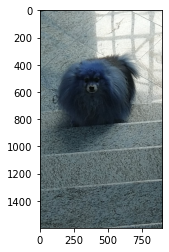

In [21]:
princeTest = cv2.imread('testePrince\\prince1.jpg')
plt.imshow(princeTest)

## Usando uma rede pré-trainada

In [22]:
from tensorflow.keras.applications import VGG16

#Temos que retirar os layers no começo da rede, pois são usados na tarefa original.
pre_trained_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

#Precisamos tambem congelar os weights da rede original, não queremos que eles sejam treinados
for layer in pre_trained_model.layers:
    layer.trainable = False


In [23]:
# Vamos usar o mesmo modelo usado anteriormente

model2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5), #Evitar overfitting
    Dense(3, activation='softmax')  #São 3 classes então temos 3 saídas - cats/dogs/pandas
])

In [24]:
model2.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history2 = model2.fit(
    train_generator,
    epochs=num_epochs,
    validation_data=validation_generator
)

Epoch 1/11
75/75 [==============================] - 76s 998ms/step - loss: 0.9422 - accuracy: 0.5221 - val_loss: 0.8715 - val_accuracy: 0.5367
Epoch 2/11
75/75 [==============================] - 72s 955ms/step - loss: 0.7269 - accuracy: 0.6187 - val_loss: 0.7358 - val_accuracy: 0.6233
Epoch 3/11
75/75 [==============================] - 71s 947ms/step - loss: 0.6275 - accuracy: 0.6913 - val_loss: 0.7243 - val_accuracy: 0.6633
Epoch 4/11
75/75 [==============================] - 68s 904ms/step - loss: 0.5472 - accuracy: 0.7458 - val_loss: 0.6228 - val_accuracy: 0.6967
Epoch 5/11
75/75 [==============================] - 74s 988ms/step - loss: 0.4413 - accuracy: 0.7937 - val_loss: 0.6414 - val_accuracy: 0.7333
Epoch 6/11
75/75 [==============================] - 73s 966ms/step - loss: 0.3515 - accuracy: 0.8492 - val_loss: 0.7454 - val_accuracy: 0.7333
Epoch 7/11
75/75 [==============================] - 71s 946ms/step - loss: 0.3032 - accuracy: 0.8783 - val_loss: 0.8485 - val_accuracy: 0.7367

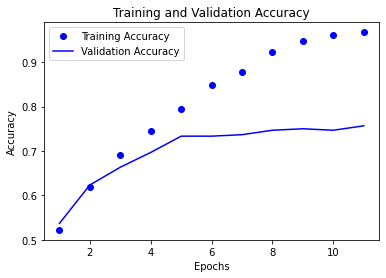

In [25]:
training_accuracy = history2.history['accuracy']
validation_accuracy = history2.history['val_accuracy']

epochs = range(1, num_epochs + 1)

plt.plot(epochs, training_accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

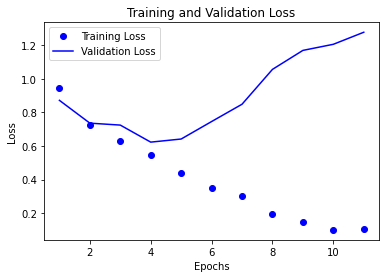

In [26]:
training_loss = history2.history['loss']
validation_loss = history2.history['val_loss']

# Plot training and validation loss
plt.plot(epochs, training_loss, 'bo', label='Training Loss')
plt.plot(epochs, validation_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [27]:
test_evaluation = model2.evaluate(test_generator)
print("Test Loss:", test_evaluation[0])
print("Test Accuracy:", test_evaluation[1])

10/10 [==============================] - 2s 217ms/step - loss: 1.0159 - accuracy: 0.7367
Test Loss: 1.0158766508102417
Test Accuracy: 0.7366666793823242


In [28]:
# Realizar as predictions
predictions = model2.predict(img_array)
class_index = tf.argmax(predictions[0])

# Mostrar qual foi a prediction
class_labels = ['Cat', 'Dog', 'Panda']
predicted_class = class_labels[class_index]
print("Predicted Class:", predicted_class)

1/1 [==============================] - 0s 69ms/step
Predicted Class: Dog


In [29]:
#Ver como o modelo irá realizar as predições nas fotos do test set

predictions = model2.predict_generator(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
predicted_labels = [class_labels[predicted_class] for predicted_class in predicted_classes]
filenames = test_generator.filenames

for filename, predicted_label in zip(filenames, predicted_labels):
    print(f"Image: {filename}, Predicted Label: {predicted_label}")


C:\Users\breno\AppData\Local\Temp\ipykernel_22820\1232362544.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model2.predict_generator(test_generator)


Image: cats\cats_00007.jpg, Predicted Label: Cat
Image: cats\cats_00026.jpg, Predicted Label: Dog
Image: cats\cats_00028.jpg, Predicted Label: Cat
Image: cats\cats_00031.jpg, Predicted Label: Panda
Image: cats\cats_00033.jpg, Predicted Label: Panda
Image: cats\cats_00045.jpg, Predicted Label: Cat
Image: cats\cats_00047.jpg, Predicted Label: Panda
Image: cats\cats_00072.jpg, Predicted Label: Panda
Image: cats\cats_00081.jpg, Predicted Label: Dog
Image: cats\cats_00082.jpg, Predicted Label: Dog
Image: cats\cats_00090.jpg, Predicted Label: Cat
Image: cats\cats_00095.jpg, Predicted Label: Cat
Image: cats\cats_00096.jpg, Predicted Label: Panda
Image: cats\cats_00100.jpg, Predicted Label: Panda
Image: cats\cats_00104.jpg, Predicted Label: Cat
Image: cats\cats_00105.jpg, Predicted Label: Dog
Image: cats\cats_00115.jpg, Predicted Label: Panda
Image: cats\cats_00128.jpg, Predicted Label: Cat
Image: cats\cats_00143.jpg, Predicted Label: Cat
Image: cats\cats_00160.jpg, Predicted Label: Cat
Image: